## 0.SetInterval

This is useful in order to avoid to lost the Google Colab session, just copy and paste the code inside the console.



```
function ConnectButton(){
    console.log("Connect pushed");
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
}

 setInterval(ConnectButton, 60000);
```



# 3.INSTALL


In [19]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main
!pip install pillow
!pip install roboflow

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


### Detection


In [ ]:
!wget -O  test-yolo.jpg model=yolov8s-seg.pt http://www.cinofilianaturale.it/Public/News/big_196_EDUCAZIONE%20CINOFILA%20001.jpg
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.6  source='test-yolo.jpg' save=true


--2024-05-06 14:53:34--  http://model=yolov8s-seg.pt/
Resolving model=yolov8s-seg.pt (model=yolov8s-seg.pt)... failed: Name or service not known.
wget: unable to resolve host address ‘model=yolov8s-seg.pt’
--2024-05-06 14:53:34--  http://www.cinofilianaturale.it/Public/News/big_196_EDUCAZIONE%20CINOFILA%20001.jpg
Resolving www.cinofilianaturale.it (www.cinofilianaturale.it)... 31.11.35.133
Connecting to www.cinofilianaturale.it (www.cinofilianaturale.it)|31.11.35.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37657 (37K) [image/jpeg]
Saving to: ‘test-yolo.jpg’

test-yolo.jpg       100%[===================>]  36.77K  --.-KB/s    in 0.1s    

2024-05-06 14:53:35 (322 KB/s) - ‘test-yolo.jpg’ saved [37657/37657]

FINISHED --2024-05-06 14:53:35--
Total wall clock time: 0.5s
Downloaded: 1 files, 37K in 0.1s (322 KB/s)
100% 22.8M/22.8M [00:00<00:00, 149MB/s] 
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summar

### Show Detection

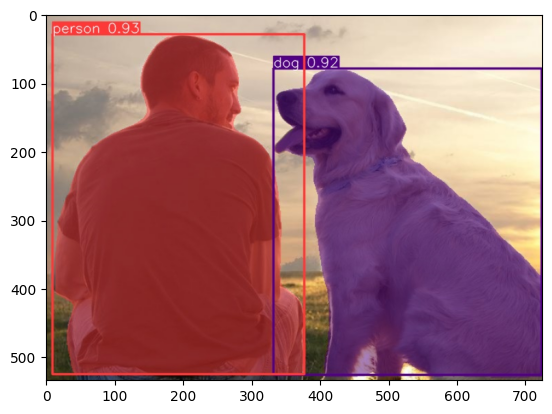

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img_path = '/content/runs/segment/predict/test-yolo.jpg'
img = Image.open(img_path)

# Visualizza l'immagine
plt.imshow(img)
plt.axis('on')
plt.show()


### Show segmentation


image 1/1 /content/test-yolo.jpg: 480x640 1 person, 1 dog, 134.6ms
Speed: 8.6ms preprocess, 134.6ms inference, 2182.5ms postprocess per image at shape (1, 3, 480, 640)


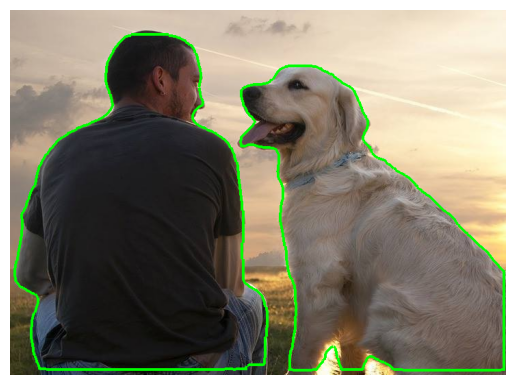

In [ ]:
from ultralytics import YOLO
from PIL import ImageDraw, Image
import numpy as np
from PIL import Image
from PIL import ImageDraw

# Carica il modello YOLO
model = YOLO('yolov8n-seg.pt')
img_path = '/content/test-yolo.jpg'

# Esegui la segmentazione sull'immagine
results = model.predict(img_path,conf=0.6)
result = results[0]
masks = result.masks

# Carica l'immagine una volta
img = Image.open(img_path)

# Disegna le maschere su questa singola immagine
draw = ImageDraw.Draw(img)
for mask_data in masks:
    mask = mask_data.data[0].cpu().numpy()
    polygon = mask_data.xy[0]
    draw.polygon(polygon, outline=(0,255,0), width=4)


# Visualizza l'immagine utilizzando matplotlib
plt.imshow(np.array(img))
plt.axis('off')
plt.show()

### Distance between two point


image 1/1 /content/test-yolo.jpg: 480x640 1 person, 1 dog, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Distance between the two central points in pixels: 338.78
Distance between the two central points in meters: 0.88


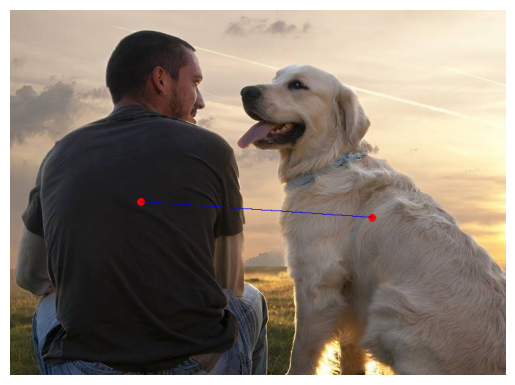

In [ ]:
from ultralytics import YOLO
from PIL import ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Image width in meters
image_width_meters = 5  # Example: image width of 5 meters

# Number of pixels in the image width
image_width_pixels = 640  # Example: image width of 640 pixels

# Scale
scale = 3  # Scale 1:3

# Conversion factor from pixels to meters
conversion_factor = image_width_meters / (image_width_pixels * scale)

# Load YOLO model
model = YOLO('yolov8n-seg.pt')
img_path = '/content/test-yolo.jpg'

# Perform segmentation on the image
results = model.predict(img_path)
result = results[0]
masks = result.masks

# Load the image once
img = Image.open(img_path)

# Draw masks and calculate central points
draw = ImageDraw.Draw(img)
centers = []
for mask_data in masks:
    min_x = int(np.min(mask_data.xy[0][:, 0]))
    max_x = int(np.max(mask_data.xy[0][:, 0]))
    min_y = int(np.min(mask_data.xy[0][:, 1]))
    max_y = int(np.max(mask_data.xy[0][:, 1]))
    center_x = (min_x + max_x) // 2
    center_y = (min_y + max_y) // 2
    centers.append((center_x, center_y))
    draw.ellipse([center_x - 5, center_y - 5, center_x + 5, center_y + 5], fill='red')

# Draw a line between the two central points
draw.line(centers, fill='blue', width=2)

# Calculate the distance between the two central points in pixels
distance_pixel = sqrt((centers[1][0] - centers[0][0])**2 + (centers[1][1] - centers[0][1])**2)

# Calculate the distance between the two central points in meters using the conversion factor
distance_meters = distance_pixel * conversion_factor

print("Distance between the two central points in pixels:", round(distance_pixel, 2))
print("Distance between the two central points in meters:", round(distance_meters, 2))

# Display the image using matplotlib
plt.imshow(np.array(img))
plt.axis('off')
plt.show()


# 4.Download from RoboFlow

In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="yOkpFuVLsae0KQ9qLG1h")
project = rf.workspace("test01-vyobk").project("cripta1")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.10, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Cripta1-1 in yolov8:: 100%|██████████| 222/222 [00:00<00:00, 5753.47it/s]


### Change data.yaml path#

# 5.Train

In [ ]:
!yolo segment task=detect mode=train  data='/content/Cripta1-1/data.yaml' epochs=100 pretrained='../yolov8n.pt'

100% 6.23M/6.23M [00:00<00:00, 109MB/s]
100% 6.23M/6.23M [00:00<00:00, 127MB/s]
Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Cripta1-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=../yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

# 6.Model Validation

Let's test all the images on the valid folder.

In [ ]:
!yolo task=detect mode=predict source='/content/Cripta1-1/valid/images' conf=0.7


Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/21 /content/Cripta1-1/valid/images/1aa8c802-e056-43e8-9918-b1bfa4736396_jpeg.rf.7d77c08c8bb2f867ac78ed67c1f889f6.jpg: 640x640 (no detections), 11.5ms
image 2/21 /content/Cripta1-1/valid/images/2aa7636b-1322-4a95-b659-3111820f534c_jpeg.rf.efafe3a145aa0c2687075743480c6fbe.jpg: 640x640 (no detections), 9.3ms
image 3/21 /content/Cripta1-1/valid/images/32783242-ff87-4eb5-8213-b032b2a4c1f8_jpeg.rf.53efffcde5dc8c7ffbba93237a3c9be8.jpg: 640x640 (no detections), 10.0ms
image 4/21 /content/Cripta1-1/valid/images/3495e0d4-c7bb-4cae-95de-f401ee64a03b_jpeg.rf.952cd5472e7aed52f83b7cb1ca61f053.jpg: 640x640 (no detections), 8.6ms
image 5/21 /content/Cripta1-1/valid/images/39839761-53c2-425d-b95d-b74e427fcc84_jpeg.rf.d63ef89aa8892fa5bbb2238b60f756e8.jpg: 640x640 (no detections), 10.4ms
image 6/21 /content/Cripta1-1/valid/images/

# 7.Export To ONNX format

this script will export the module to the onnx format and and save the modules on Google Drive.

In [21]:
!yolo export model="best.pt" format=onnx imgsz=[640,640] simplify dynamic


Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnxsim>=0.4.33', 'onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 248.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 287.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.8s, installed 2 packages: ['onnxsim>=0.4.33', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success 

8. Continuos training